In [26]:
!pip install matplotlib

     |████████████████████████████████| 11.3 MB 2.6 MB/s eta 0:00:01
     |████████████████████████████████| 898 kB 32.2 MB/s eta 0:00:01
     |████████████████████████████████| 40 kB 15.7 MB/s eta 0:00:01
     |████████████████████████████████| 16.8 MB 22.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 20.7 MB/s eta 0:00:01
     |████████████████████████████████| 4.3 MB 23.1 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 16.4 MB/s eta 0:00:01


In [27]:
import matplotlib.pyplot as plt

In [28]:
file = open('solutions/power_test_topo_25_anel_n1_l2.txt', 'r')
lines = file.readlines();
file.close()

consumption_string = lines[0].split('=')[1].strip()
consumption_string = consumption_string[1:len(consumption_string)-1]
consumption_set = [float(x) for x in consumption_string.split(',')]

centralization_string = lines[1].split('=')[1].strip()
centralization_string = centralization_string[1:len(centralization_string)-1]
centralization_set = [float(x) for x in centralization_string.split(',')]

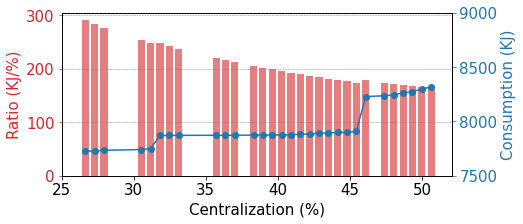

In [30]:
fig, ax1 = plt.subplots(figsize=(7, 3))

color1 = 'tab:red'
color2 = 'tab:blue'
alpha = 0.6
ax1.set_ylabel('Ratio (KJ/%)', color=color1, fontsize=15, fontfamily='Arial')
ax1.set_xlabel('Centralization (%)', fontsize=15, fontfamily='Arial')

ax1.tick_params(axis='y', which='major', labelsize=15, colors=color1)
ax1.tick_params(axis='x', which='major', labelsize=15)
ax1.yaxis.grid(color='gray', linestyle='--', linewidth=0.5)

percentage_centralization = [(i / 154) * 100 for i in centralization_set]
energy_consumption = [i * 3.6 for i in consumption_set]

bar = ax1.bar(percentage_centralization, [i / j for i, j in zip(energy_consumption, percentage_centralization)],
                color=color1, alpha=alpha, width=.5)

# plt.yticks([0.00, 0.02, 0.04, 0.06, 0.08])
plt.yticks([0, 100, 200, 300])

ax2 = ax1.twinx()
ax2.set_ylabel('Consumption (KJ)', color=color2, fontsize=15, fontfamily='Arial')

ax2.tick_params(axis='y', which='major', colors=color2, labelsize=15)
ax2.tick_params(axis='x', which='major', labelsize=15)
# ax2.yaxis.grid(color='gray', linestyle='--', linewidth=0.5)

line, = ax2.plot(percentage_centralization, energy_consumption, color=color2, marker='o')

# plt.yticks([2.1, 2.2, 2.3, 2.4, 2.5])
plt.yticks([7500, 8000, 8500, 9000])
plt.xticks([25, 30, 35, 40, 45, 50])

plt.show()
